## The Woks of Life Recommender System

### Final Capstone

### Thinkful Data Science Flex

### Sara Lee Lanclos

### Import Packages

In [178]:
#Import packages
import requests
import json
import pandas as pd
from numpy import nan
from os import path
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from wordcloud import WordCloud 

## Cells from *Final Capstone - The Woks of Life Recommendation Engine Data Scraping and Cleaning*

### Load the Data

In [2]:
#Access the data
#Print the directory
import os 
cwd=os.getcwd()

print (cwd)

/Users/saralanclos/Thinkful Data Science Projects/Capstone Four: Final Capstone


In [3]:
#Change the directory to the CSV file
os.chdir('/Users/saralanclos/Desktop/thewoksoflife')
os.getcwd()

'/Users/saralanclos/Desktop/thewoksoflife'

In [4]:
#Rename the data
thewoksoflife = pd.read_csv('thewoksofliferecipes.csv')
#, sep=';

In [5]:
#Visualize the data, raw!
thewoksoflife.head()

,Name,Prep Time,Cook Time,Total Time,Ingredients,Calories,Review Count,Average Rating,Category,URL
0,Shaanxi Saozi Mian (陕西臊子面),PT90M,PT45M,PT135M,"1/4 cup oil ((any neutral oil, such as vegetab...",873 kcal,2.0,5.00,Noodle Soup,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,NaN,PT10M,PT10M,"3 tablespoons laksa paste', '2 teaspoons brown...",689 kcal,5.0,5.00,Noodles,https://thewoksoflife.com/laksa-instant-ramen/
2,Tan Tan Ramen,PT30M,PT15M,PT45M,8 ounces ground pork ((can substitute any othe...,931 kcal,9.0,4.89,"Main Course', 'Noodle Soup",https://thewoksoflife.com/tan-tan-ramen/
3,Malaysian Hokkien Mee (KL Version),PT30M,PT45M,PT75M,12 ounces skin-on lean pork belly ((divided))'...,393 kcal,3.0,4.67,Noodles,https://thewoksoflife.com/malaysian-hokkien-mee/
4,Northern Chinese Sour Cabbage Stew with Glass ...,PT30M,PT40M,PT70M,"4 cups water', '1 pound pork belly ((or double...",524 kcal,4.0,5.00,Main Course,https://thewoksoflife.com/northern-chinese-sou...


In [6]:
#data shape
thewoksoflife.shape

(1682, 10)

The data has 1682 rows and 10 columns.

In [7]:
#data types
thewoksoflife.dtypes

Name               object
Prep Time          object
Cook Time          object
Total Time         object
Ingredients        object
Calories           object
Review Count      float64
Average Rating    float64
Category           object
URL                object
dtype: object

"Name", "Prep Time", "Cook Time", "Total Time", "Ingredients", "Calories", "Category" and "URL" are type 'object'.

"Reiew Count" and "Average Rating" are type 'float64'.

In [8]:
#data info
thewoksoflife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1682 non-null   object 
 1   Prep Time       1641 non-null   object 
 2   Cook Time       1604 non-null   object 
 3   Total Time      1676 non-null   object 
 4   Ingredients     1682 non-null   object 
 5   Calories        1538 non-null   object 
 6   Review Count    1543 non-null   float64
 7   Average Rating  1543 non-null   float64
 8   Category        1663 non-null   object 
 9   URL             1682 non-null   object 
dtypes: float64(2), object(8)
memory usage: 131.5+ KB


In [9]:
#null values?
thewoksoflife.isnull().sum()

Name                0
Prep Time          41
Cook Time          78
Total Time          6
Ingredients         0
Calories          144
Review Count      139
Average Rating    139
Category           19
URL                 0
dtype: int64

There are null values. "Prep Time" has 41 null values, "Cook Time" has 78 null values, "Total Time" has 6 null values, "Calories" has 144 null values, "Review Count" has 139 null values, "Average Rating" has 139 null values and "Category" has 19 null values.

How messy is the data?

In [10]:
thewoksoflife.head(12)

,Name,Prep Time,Cook Time,Total Time,Ingredients,Calories,Review Count,Average Rating,Category,URL
0,Shaanxi Saozi Mian (陕西臊子面),PT90M,PT45M,PT135M,"1/4 cup oil ((any neutral oil, such as vegetab...",873 kcal,2.0,5.00,Noodle Soup,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,NaN,PT10M,PT10M,"3 tablespoons laksa paste', '2 teaspoons brown...",689 kcal,5.0,5.00,Noodles,https://thewoksoflife.com/laksa-instant-ramen/
2,Tan Tan Ramen,PT30M,PT15M,PT45M,8 ounces ground pork ((can substitute any othe...,931 kcal,9.0,4.89,"Main Course', 'Noodle Soup",https://thewoksoflife.com/tan-tan-ramen/
3,Malaysian Hokkien Mee (KL Version),PT30M,PT45M,PT75M,12 ounces skin-on lean pork belly ((divided))'...,393 kcal,3.0,4.67,Noodles,https://thewoksoflife.com/malaysian-hokkien-mee/
4,Northern Chinese Sour Cabbage Stew with Glass ...,PT30M,PT40M,PT70M,"4 cups water', '1 pound pork belly ((or double...",524 kcal,4.0,5.00,Main Course,https://thewoksoflife.com/northern-chinese-sou...
5,Stir-fried Rice Cakes (Nian Gao),PT60M,NaN,PT60M,"8 oz. pork shoulder or loin ((julienned))', '1...",484 kcal,30.0,4.87,Noodles and Pasta,https://thewoksoflife.com/stir-fried-sticky-ri...
6,Beef Lo Mein,PT35M,PT10M,PT45M,"12 ounces flank steak', '1 teaspoon cornstarch...",323 kcal,38.0,4.90,Noodles and Pasta,https://thewoksoflife.com/beef-lo-mein/
7,Chicken Mei Fun,PT40M,PT5M,PT45M,"7 ounces dried thin rice vermicelli noodles', ...",399 kcal,21.0,4.96,Noodles,https://thewoksoflife.com/chicken-mei-fun/
8,Pad Thai,PT40M,PT10M,PT50M,1.5 ounces tamarind pulp ((plus ½ cup boiling ...,698 kcal,18.0,4.89,Main Course,https://thewoksoflife.com/pad-thai/
9,Singapore Noodles (Singapore Mei Fun),PT25M,PT10M,PT35M,"5 ounces dried vermicelli rice noodles', '12 ...",402 kcal,43.0,4.89,Noodles and Pasta,https://thewoksoflife.com/singapore-noodles-me...


In [11]:
#Call this so we can see the totality of the "Ingredients" data.
pd.set_option('display.max_colwidth', None)

In [12]:
thewoksoflife.head(2)

,Name,Prep Time,Cook Time,Total Time,Ingredients,Calories,Review Count,Average Rating,Category,URL
0,Shaanxi Saozi Mian (陕西臊子面),PT90M,PT45M,PT135M,"1/4 cup oil ((any neutral oil, such as vegetable or canola oil))', '1 cinnamon stick', '3 star anise', '3 dried bay leaves', '2 tablespoons ginger ((minced))', '1 pound pork belly or boneless country ribs ((cut into 1/2 inch pieces))', '1 teaspoon salt', '2 tablespoons Sichuan chili flakes ((or to taste))', '1/4 cup Shaoxing wine', '1 1/2 teaspoons five spice powder', '2 tablespoons light soy sauce', '1/3-1/2 cup Chinese black vinegar', '2 teaspoons sugar', '1/2 teaspoon cornstarch', '2 teaspoons water', '1 large egg', '1 tablespoon oil', '2 tablespoons oil', '1 tablespoon ginger ((minced))', '1/2 cup carrot ((diced into 1/2 inch cubes))', '2/3 cup potato ((diced into 1/2 inch cubes))', '1 1/2 cups rehydrated wood ear mushrooms ((rinsed and torn into small pieces))', '1/4 cup rehydrated dried lily flowers ((cut into 1-inch pieces))', '1 tablespoon oyster sauce', '8 cups homemade chicken stock ((alternatively, 4 cups chicken stock and 4 cups water))', '8 fried soy puffs ((cut into quarters))', 'salt (to taste)', '5 servings thin wheat noodles ((or rice noodles, if you need a gluten-free option))', '1/3 cup garlic chives ((cut into 1/2 inch pieces))', '1 scallion ((finely chopped))', 'homemade chili oil ((optional, to taste))",873 kcal,2.0,5.0,Noodle Soup,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,NaN,PT10M,PT10M,"3 tablespoons laksa paste', '2 teaspoons brown sugar', '3 1/2 cups water', '1 cup coconut milk', '1 package Maruchan Chicken-flavored Instant Noodles', '1 package Maruchan Shrimp-flavored Instant Noodles', '1/4 cup cilantro leaves', '1 scallion ((chopped))', '1 Thai bird chili ((finely chopped, optional))', '2 lime wedges",689 kcal,5.0,5.0,Noodles,https://thewoksoflife.com/laksa-instant-ramen/


In [13]:
#Reset "display.max_colwidth" option so we can better visualize the other columns. 
pd.reset_option('display.max_colwidth')

In [14]:
thewoksoflife.head(2)

,Name,Prep Time,Cook Time,Total Time,Ingredients,Calories,Review Count,Average Rating,Category,URL
0,Shaanxi Saozi Mian (陕西臊子面),PT90M,PT45M,PT135M,"1/4 cup oil ((any neutral oil, such as vegetab...",873 kcal,2.0,5.0,Noodle Soup,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,NaN,PT10M,PT10M,"3 tablespoons laksa paste', '2 teaspoons brown...",689 kcal,5.0,5.0,Noodles,https://thewoksoflife.com/laksa-instant-ramen/


Potential Changes to the DataFrame and Data - 

General DataFrame Cleaning:

- For the column labels, it will be easier to call them if the spaces are removed. 
- For the row labels, maybe they should be renamed.  
- For the columns ordering, they should be reordered to make more sense for the task.

Data Cleaning: 

Analyzing the web page for the first row (https://thewoksoflife.com/shaanxi-saozi-mian/):

- Name: Appears to be good. Maybe will have to deal with the Chinese characters?

- Prep Time: "PT" stands for Prep Time, "M" stands for Minutes. Do not need "PT" or "M".

- Cook Time: "PT" stands for Prep Time, "M" stands for Minutes. Do not need "PT" or "M".

- Total Time: "PT" stands for Prep Time, "M" stands for Minutes. Do not need "PT" or "M".

- Ingredients: This column will need a bit of cleaning. There are '' around some of the ingredients and there are no '' around some of the ingredients. Want to remove ''. There are (( around some of the ingredients with more detailed information. Want to remove ((. There are quantities listed for the ingredients. Want to remove the quantities (numbers) and fractions that some quantities are listed as. There are - in some of the ingredients. Want to remove - . Only want the names of the ingredients, we do not want to measurements. 

- Calories: "kcal" stands for kilocalorie. We do not need "kcal".

- Review Count: Appears to be good. 

- Average Rating: Appears to be good. 

- Category: Appears to be good.

- URL: Appears to be good. 

*Remove the single parenthesis, double parenthesis, numbers, fractions, periods, dashes, slashes, apostrophes. 

*Remove the numbers and measurements (for this project, we will not take into account ingredient quantity because I do not think it is a valuable measure that has severe consequences on the recipe that an individual chooses to follow). Care about the ingredients. For future analyses, maybe the numbers and measurements can be placed back in.

*For the ingredients, just want the names of the ingredients, comma separated. Do not want the measurements. 

We need to clean the data!

### Data Cleaning

General DataFrame Cleaning

Rename the columns

In [15]:
#Rename the columns inplace
thewoksoflife.rename(columns={"Name": "Name", "Prep Time": "Prep_Time", "Cook Time": "Cook_Time", "Total Time": "Total_Time", "Ingredients": "Ingredients", "Calories": "Calories", "Review Count": "Review_Count", "Average Rating": "Average_Rating", "Category": "Category", "URL": "URL"}, inplace=True)

In [16]:
#Check out the column names!
thewoksoflife.head(2)

,Name,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Review_Count,Average_Rating,Category,URL
0,Shaanxi Saozi Mian (陕西臊子面),PT90M,PT45M,PT135M,"1/4 cup oil ((any neutral oil, such as vegetab...",873 kcal,2.0,5.0,Noodle Soup,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,NaN,PT10M,PT10M,"3 tablespoons laksa paste', '2 teaspoons brown...",689 kcal,5.0,5.0,Noodles,https://thewoksoflife.com/laksa-instant-ramen/


In [17]:
thewoksoflife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1682 non-null   object 
 1   Prep_Time       1641 non-null   object 
 2   Cook_Time       1604 non-null   object 
 3   Total_Time      1676 non-null   object 
 4   Ingredients     1682 non-null   object 
 5   Calories        1538 non-null   object 
 6   Review_Count    1543 non-null   float64
 7   Average_Rating  1543 non-null   float64
 8   Category        1663 non-null   object 
 9   URL             1682 non-null   object 
dtypes: float64(2), object(8)
memory usage: 131.5+ KB


Looks good!

Reorder the columns

In [18]:
#Reorder the columns so they make more sense for analysis.
thewoksoflife=thewoksoflife[["Name", "Category", "Prep_Time", "Cook_Time", "Total_Time", "Ingredients", "Calories", "Average_Rating", "Review_Count", "URL"]]

In [19]:
#Check out the columns ordering
thewoksoflife.head(2)

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
0,Shaanxi Saozi Mian (陕西臊子面),Noodle Soup,PT90M,PT45M,PT135M,"1/4 cup oil ((any neutral oil, such as vegetab...",873 kcal,5.0,2.0,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,Noodles,NaN,PT10M,PT10M,"3 tablespoons laksa paste', '2 teaspoons brown...",689 kcal,5.0,5.0,https://thewoksoflife.com/laksa-instant-ramen/


In [20]:
thewoksoflife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1682 non-null   object 
 1   Category        1663 non-null   object 
 2   Prep_Time       1641 non-null   object 
 3   Cook_Time       1604 non-null   object 
 4   Total_Time      1676 non-null   object 
 5   Ingredients     1682 non-null   object 
 6   Calories        1538 non-null   object 
 7   Average_Rating  1543 non-null   float64
 8   Review_Count    1543 non-null   float64
 9   URL             1682 non-null   object 
dtypes: float64(2), object(8)
memory usage: 131.5+ KB


Looks good!

For now, will not re-index the rows. Maybe later if it seems beneficial...

Data Cleaning

In [21]:
#functions to clean the data
#view Python regular expression operations (regex) documentation

#define a function to remove a certain string from rows in the dataframe and replace it with nothing.
def remove_string(df, col_name, string_to_remove):
    df[col_name] = df[col_name].str.replace(string_to_remove, '')

#make a list of string to remove
strings_to_remove = [r"\(([^()]*\))", r"\([^()]*\)", '\d+', r'\d+\/\d+', '.', '-', '/', "'", '¼', '½', '⅛' , '¾', '⅔']

for num_strings in range(len(strings_to_remove)):
#this is for Ingredients
    remove_string(thewoksoflife, 'Ingredients', strings_to_remove[num_strings])
    
#remove characters from cooking times (Prep Time, Cook Time, Total Time) and calories (Calories)
characters_to_remove = ['P', 'T', 'M', 'kcal']

for num_characters in range(len(characters_to_remove)):
    remove_string(thewoksoflife, 'Prep_Time', characters_to_remove[num_characters])
    remove_string(thewoksoflife, 'Cook_Time', characters_to_remove[num_characters])
    remove_string(thewoksoflife, 'Total_Time', characters_to_remove[num_characters])
    remove_string(thewoksoflife, 'Calories', characters_to_remove[num_characters])

#remove the ingredient measurements from Ingredients
measurements_to_remove = ['gram', 'gm', 'grams', 'gms', 'cup', 'cups', 'teaspoon', 'teaspoons', 'tablespoon', 'tablespoons', 'ounce', 'oz', 'ounces', 'ozs', 'slice', 'slices', 'pound', 'pounds', 'sheet', 'sheets', 'clove', 'cloves', 'package', 'packages', 'handful of', 'chopped']

remove_words = r'\b(?:{})\b'.format('|'.join(measurements_to_remove))
#remove the measurement words
thewoksoflife['Ingredients'] = thewoksoflife['Ingredients'].str.replace(remove_words, '')
#ingredients all lowercase
thewoksoflife['Ingredients'] = thewoksoflife['Ingredients'].str.lower()



/Users/saralanclos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/Users/saralanclos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/saralanclos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: The default value of regex will change from True to False in a future version.


In [22]:
display(thewoksoflife)

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
0,Shaanxi Saozi Mian (陕西臊子面),Noodle Soup,90,45,135,"oil , cinnamon stick, star anise, drie...",873,5.00,2.0,https://thewoksoflife.com/shaanxi-saozi-mian/
1,Laksa Instant Ramen,Noodles,NaN,10,10,"laksa paste, brown sugar, water, coco...",689,5.00,5.0,https://thewoksoflife.com/laksa-instant-ramen/
2,Tan Tan Ramen,"Main Course', 'Noodle Soup",30,15,45,"ground pork , mirin, ginger , vegetabl...",931,4.89,9.0,https://thewoksoflife.com/tan-tan-ramen/
3,Malaysian Hokkien Mee (KL Version),Noodles,30,45,75,"skinon lean pork belly , salt, shrimp , ...",393,4.67,3.0,https://thewoksoflife.com/malaysian-hokkien-mee/
4,Northern Chinese Sour Cabbage Stew with Glass ...,Main Course,30,40,70,"water, pork belly , shaoxing wine, gin...",524,5.00,4.0,https://thewoksoflife.com/northern-chinese-sou...
...,...,...,...,...,...,...,...,...,...,...
1677,Cold Tofu Salad,Tofu,5,5,10,"tofu “noodles”, carrot , long hot green ...",NaN,NaN,NaN,https://thewoksoflife.com/cold-tofu-salad/
1678,Chicken and Thai Basil Stir-Fry,Chicken and Poultry,5,10,15,"chicken breast, fish sauce, soy sauce, ...",324,NaN,NaN,https://thewoksoflife.com/chicken-and-thai-bas...
1679,Easy Scallion and Ginger Shrimp Stir Fry,Fish and Seafood,10,5,15,"shrimp , scallions, a inch piece of ginger...",179,4.67,3.0,https://thewoksoflife.com/scallion-and-ginger-...
1680,Everyday Chinese Vegetable Stir-Fry,Vegetables,10,10,20,"stalks celery , carrots , snow peas , f...",166,NaN,NaN,https://thewoksoflife.com/everyday-vegetable-s...


In [23]:
#shape of data
thewoksoflife.shape

(1682, 10)

1682 rows, 10 columns

Are there duplicates present within the rows/in the DataFrame?

In [24]:
#Look at the number of rows in DataFrame, then drop duplicates, and then look at the number of rows again.
#rows in original data
original_data_rows = thewoksoflife.shape[0]
#drop duplicates
thewoksoflife = thewoksoflife.drop_duplicates()
#rows after drop duplicates
drop_duplicate_data_rows = thewoksoflife.shape[0]
#How many duplicate rows in the data?
print("The number of duplicate rows in the data: {}" .format(original_data_rows-drop_duplicate_data_rows))

The number of duplicate rows in the data: 731


In [25]:
thewoksoflife.shape

(951, 10)

The new DataFrame has 951 rows and 10 columns.

Look at everything:

In [26]:
#columns
thewoksoflife.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1625
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            951 non-null    object 
 1   Category        938 non-null    object 
 2   Prep_Time       930 non-null    object 
 3   Cook_Time       906 non-null    object 
 4   Total_Time      948 non-null    object 
 5   Ingredients     951 non-null    object 
 6   Calories        866 non-null    object 
 7   Average_Rating  864 non-null    float64
 8   Review_Count    864 non-null    float64
 9   URL             951 non-null    object 
dtypes: float64(2), object(8)
memory usage: 81.7+ KB


In [27]:
#Name
display(thewoksoflife.Name.unique())
#thewoksoflife.Name.unique()

array(['Shaanxi Saozi Mian (陕西臊子面)', 'Laksa Instant Ramen',
       'Tan Tan Ramen', 'Malaysian Hokkien Mee (KL Version)',
       'Northern Chinese Sour Cabbage Stew with Glass Noodles',
       'Stir-fried Rice Cakes (Nian Gao)', 'Beef Lo Mein',
       'Chicken Mei Fun', 'Pad Thai',
       'Singapore Noodles (Singapore Mei Fun)', 'Zha Cai Rousi Mian',
       'Ultimate Roasted Tomato Meat Sauce', 'How to Make Liangpi',
       'Spicy Cold Skin Noodles (Liangpi)', 'Peanut Noodles',
       'Suan La Fen', 'Asian Garlic Noodles',
       'Simple, Spicy Pan-fried Noodles', 'Slow Roasted Tomato Pasta',
       'Yaki Udon', 'Drunken Noodles (Pad Kee Mao)',
       'Yunnan Rice Noodle Soup (云南小锅米线)', 'Poor Man’s Thai Noodles',
       'King Oyster Mushrooms with Garlicky Glass Noodles',
       'Vegetable Yakisoba', 'Homemade Chinese Egg Noodles',
       'Tuna Tomato Pasta',
       'Chicken Khao Soi (Thai Coconut Curry Noodle Soup)',
       'Chinese Handmade Noodles', 'Beef Chow Fun', 'Laksa',
       

In [28]:
#how many null values are there?
thewoksoflife.Name.isnull().sum()

0

No NaN Values!

In [29]:
#Category
display(thewoksoflife.Category.unique())
#thewoksoflife.Category.unique()

array(['Noodle Soup', 'Noodles', "Main Course', 'Noodle Soup",
       'Main Course', 'Noodles and Pasta', 'Soup', 'Pasta', 'Dim Sum',
       'Soups', 'Vegetarian', 'Salad', "Easy', 'Quick &amp;amp",
       "Noodles', 'Rice &amp;amp", 'Dumplings', 'Holiday Recipes', 'Beef',
       'Chicken and Poultry', 'Vegetables', 'Chicken', 'Noodles and Pasa',
       'Soups and Stocks', 'Noodles ad Pasta', 'Rice', nan, 'Pork',
       'Appetizer', "Pork', 'Ribs", 'Fish and Seafood',
       "Fish &amp; Seafood', 'Rice", 'Vegetable', 'Lamb',
       'Appetizers and Snacks', "Chicken', 'Rice", 'Appetizers',
       "Chicken &amp;amp', 'Poultry",
       "Chicken &amp;amp', 'Holiday', 'Poultry", 'Chicken ad poultry',
       'Salads', 'Chinese takeout', 'Sandwiches', 'Bread and Pizza',
       'Tofu', 'Beef recipes', 'Fish &amp; Seafood', 'Condiments', 'Fish',
       'Shrimp', 'Seafood', "Fish &amp;amp', 'Seafood",
       'Chinese New Year', 'Fish anbs Seafood', 'Eggs',
       "Fish and Seafood', 'Pork', 'Tof

In [30]:
thewoksoflife.Category.nunique()

85

In [31]:
#to understand the proper Category value names and syntax!
#thewoksoflife.Category.value_counts()

Do not want so many categories, combine them into more consolidated categories (shorter list).

*Consolidated categories:

- Soup/Stock
- Vegetable/Salad
- Appetizer/Snack/Dumpling
- Breakfast/Brunch/Dim Sum
- Quick/Easy
- Main/Takeout/Side
- Noodle/Rice
- Fish/Seafood
- Poultry
- Pork
- Beef
- Lamb
- Egg
- Tofu
- Vegetarian/Vegan
- Bakery/Bread/Pizza/Flour
- Sweet
- Holiday/Chinese New Year
- Mexican
- Beverage
- Condiment

*Remember to check NaN values!

In [32]:
#Consolidated categories:
new_categories = {'Noodle Soup' : 'Soup/Stock', 'Noodles' : 'Noodle/Rice', "Main Course', 'Noodle Soup" : 'Soup/Stock',
       'Main Course' : 'Main/Takeout/Side', 'Noodles and Pasta' : 'Noodle/Rice', 'Soup' : 'Soup/Stock', 'Pasta' : 'Noodle/Rice', 'Dim Sum' : 'Breakfast/Brunch/Dim Sum',
       'Soups' : 'Soup/Stock', 'Vegetarian' : 'Vegetarian/Vegan', 'Salad' : 'Vegetable/Salad', "Easy', 'Quick &amp;amp" : 'Quick/Easy',
       "Noodles', 'Rice &amp;amp" : 'Noodle/Rice', 'Dumplings' : 'Appetizer/Snack/Dumpling', 'Holiday Recipes' : 'Holiday/Chinese New Year', 'Beef' : 'Beef',
       'Chicken and Poultry' : 'Poultry', 'Vegetables' : 'Vegetable/Salad', 'Chicken' : 'Poultry', 'Noodles and Pasa' : 'Noodle/Rice',
       'Soups and Stocks' : 'Soup/Stock', 'Noodles ad Pasta' : 'Noodle/Rice', 'Rice' : 'Noodle/Rice', 'Pork' : 'Pork',
       'Appetizer' : 'Appetizer/Snack/Dumpling', "Pork', 'Ribs" : 'Pork', 'Fish and Seafood' : 'Fish/Seafood',
       "Fish &amp; Seafood', 'Rice" : 'Fish/Seafood', 'Vegetable' : 'Vegetable/Salad', 'Lamb' : 'Lamb',
       'Appetizers and Snacks' : 'Appetizer/Snack/Dumpling', "Chicken', 'Rice" : 'Poultry', 'Appetizers' : 'Appetizer/Snack/Dumpling',
       "Chicken &amp;amp', 'Poultry" : 'Poultry',
       "Chicken &amp;amp', 'Holiday', 'Poultry" : 'Poultry', 'Chicken ad poultry' : 'Poultry',
       'Salads' : 'Vegetable/Salad', 'Chinese takeout' : 'Main/Takeout/Side', 'Sandwiches' : 'Bakery/Bread/Pizza/Flour', 'Bread and Pizza' : 'Bakery/Bread/Pizza/Flour',
       'Tofu' : 'Tofu', 'Beef recipes' : 'Beef', 'Fish &amp; Seafood' : 'Fish/Seafood', 'Condiments' : 'Condiment', 'Fish' : 'Fish/Seafood',
       'Shrimp' : 'Fish/Seafood', 'Seafood' : 'Fish/Seafood', "Fish &amp;amp', 'Seafood" : 'Fish/Seafood',
       'Chinese New Year' : 'Holiday/Chinese New Year', 'Fish anbs Seafood' : 'Fish/Seafood', 'Eggs' : 'Egg',
       "Fish and Seafood', 'Pork', 'Tofu" : 'Pork', 'Chinese bakery' : 'Bakery/Bread/Pizza/Flour',
       "Appetizer', 'Breakfast and Brunch" : 'Breakfast/Brunch/Dim Sum', "Main Course', 'Pork" : 'Pork',
       'Sandwich' : 'Bakery/Bread/Pizza/Flour', 'Bread' : 'Bakery/Bread/Pizza/Flour', "Soups &amp;amp', 'Stocks" : 'Soup/Stock', 'Breakfast' : 'Breakfast/Brunch/Dim Sum',
       'Dessert and Sweet Stuff' : 'Sweet', 'appetizers and dumplings' : 'Appetizer/Snack/Dumpling',
       "Appetizer', 'Vegetables" : 'Vegetable/Salad', "Appetizers', 'Soup" : 'Soup/Stock', 'Snack' : 'Appetizer/Snack/Dumpling',
       'Side Dish' : 'Main/Takeout/Side', 'Sweet Stuff' : 'Sweet', "Bread &amp;amp', 'Pizza" : 'Bakery/Bread/Pizza/Flour',
       'Bread and Pizzaq' : 'Bakery/Bread/Pizza/Flour', 'Dessert' : 'Sweet',
       "Breakfast', 'Desserts &amp; Sweet stuff" : 'Sweet', 'Baking' : 'Bakery/Bread/Pizza/Flour',
       "Breakfast', 'Brunch', 'Dessert" : 'Sweet', 'Chinese' : 'Main/Takeout/Side',
       'Breakfast and Brunch' : 'Breakfast/Brunch/Dim Sum', 'desserts' : 'Sweet', 'desserts and Sweet Stuff' : 'Sweet',
       "Breakfast and Brunch', 'Dessert and Sweet Stuff" : 'Sweet',
       "Salad', 'Vegetables" : 'Vegetable/Salad', 'Mexican' : 'Mexican', 'Vegan' : 'Vegetarian/Vegan', 'Vegetabkles' : 'Vegetable/Salad',
       "Appetizer', 'Salad" : 'Vegetable/Salad', "Vegetables', 'Vegetarian" : 'Vegetarian/Vegan', 'Egg' : 'Egg',
       'Beverages' : 'Beverage'}

thewoksoflife['Category'] = thewoksoflife['Category'].map(new_categories)

In [33]:
thewoksoflife.Category.value_counts()

Noodle/Rice                 146
Poultry                     111
Sweet                        88
Pork                         84
Vegetable/Salad              82
Appetizer/Snack/Dumpling     72
Fish/Seafood                 63
Beef                         55
Soup/Stock                   55
Bakery/Bread/Pizza/Flour     49
Tofu                         34
Main/Takeout/Side            27
Breakfast/Brunch/Dim Sum     23
Condiment                    14
Vegetarian/Vegan             11
Lamb                         10
Egg                           7
Holiday/Chinese New Year      3
Quick/Easy                    2
Beverage                      1
Mexican                       1
Name: Category, dtype: int64

In [34]:
#double check all data is there!
thewoksoflife.Category.value_counts().sum()
#good!

938

Look at NaN values:

In [35]:
#how many null values are there?
thewoksoflife.Category.isnull().sum()

13

In [36]:
#what are the null values?
category_nan=(thewoksoflife.Category.isnull()==True)

In [37]:
thewoksoflife[category_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
148,Shortcut Sticky Rice Dumplings (Zongzi),NaN,360,90,450,"uncooked sticky rice , dried bamboo leave...",675,5.00,7.0,https://thewoksoflife.com/lazy-sticky-rice-dum...
150,30 Minute Multigrain Congee,NaN,600,30,630,"brown rice, brown sweet rice, black rice, blac...",NaN,4.67,3.0,https://thewoksoflife.com/multigrain-congee/
372,A Bi-Continental Thanksgiving Turkey Recipe,NaN,5,NaN,5,"garlic, salt, pepper, olive oil",NaN,NaN,NaN,https://thewoksoflife.com/bicontinental-thanks...
567,Stuffed Chinese Fried Gluten Balls,NaN,75,25,100,"fresh shiitake mushrooms , ginger , scal...",232,5.00,4.0,https://thewoksoflife.com/chinese-fried-gluten...
673,Sausage Balls 2 Ways,NaN,20,25,45,"lb raw pork sausage , bisquick or other bis...",NaN,4.67,6.0,https://thewoksoflife.com/sausage-balls-2-ways/
695,Sliced Pork Belly with Spicy Garlic Peanut Sauce,NaN,15,45,60,"salt , slab of pork belly , cilantro, ...",359,5.00,1.0,https://thewoksoflife.com/sliced-pork-belly-wi...
736,Chinese Boiled Peanuts,NaN,120,60,180,"fresh raw peanuts, in the shell , water , ...",312,5.00,1.0,https://thewoksoflife.com/chinese-boiled-peanuts/
821,Huevos Rancheros Nachos with Avocado Crema,NaN,20,20,40,"bacon andor chorizo , can black beans , t...",556,5.00,1.0,https://thewoksoflife.com/huevos-rancheros-nac...
827,Maple Roasted Nuts,NaN,NaN,10,10,"nuts , maple syrup, salt, sesame seeds",247,5.00,2.0,https://thewoksoflife.com/maple-roasted-nuts/
851,Homemade Multigrain Flour,NaN,20,NaN,20,"brown rice , millet , barley , rolled ...",243,5.00,1.0,https://thewoksoflife.com/multigrain-flour/


In [38]:
#Name of NaN in Category recipes
thewoksoflife[category_nan]['Name']

148              Shortcut Sticky Rice Dumplings (Zongzi)
150                          30 Minute Multigrain Congee
372          A Bi-Continental Thanksgiving Turkey Recipe
567                   Stuffed Chinese Fried Gluten Balls
673                                 Sausage Balls 2 Ways
695     Sliced Pork Belly with Spicy Garlic Peanut Sauce
736                               Chinese Boiled Peanuts
821           Huevos Rancheros Nachos with Avocado Crema
827                                   Maple Roasted Nuts
851                            Homemade Multigrain Flour
1008                       Funfetti Ice Cream Sandwiches
1063                                How to Dry Mushrooms
1522                                            Tea Eggs
Name: Name, dtype: object

In [39]:
#Fill with "Noodle/Rice"
query_one = 'Shortcut Sticky Rice Dumplings (Zongzi)'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_one, col] = thewoksoflife[thewoksoflife['Name']==query_one].fillna('Noodle/Rice')
#Fill with "Noodle/Rice"
query_two = '30 Minute Multigrain Congee'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_two, col] = thewoksoflife[thewoksoflife['Name']==query_two].fillna('Noodle/Rice')
#Fill with "Poultry"
query_three = 'A Bi-Continental Thanksgiving Turkey Recipe'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_three, col] = thewoksoflife[thewoksoflife['Name']==query_three].fillna('Poultry')
#Fill with "Vegetable/Salad"
query_four = 'Stuffed Chinese Fried Gluten Balls'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_four, col] = thewoksoflife[thewoksoflife['Name']==query_four].fillna('Vegetable/Salad')
#Fill with "Pork"
query_five = 'Sausage Balls 2 Ways'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_five, col] = thewoksoflife[thewoksoflife['Name']==query_five].fillna('Pork')
#Fill with "Pork"
query_six = 'Sliced Pork Belly with Spicy Garlic Peanut Sauce'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_six, col] = thewoksoflife[thewoksoflife['Name']==query_six].fillna('Pork')
#Fill with "Appetizer/Snack/Dumpling"
query_seven = 'Chinese Boiled Peanuts'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_seven, col] = thewoksoflife[thewoksoflife['Name']==query_seven].fillna('Appetizer/Snack/Dumpling')
#Fill with "Mexican"
query_eight = 'Huevos Rancheros Nachos with Avocado Crema'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_eight, col] = thewoksoflife[thewoksoflife['Name']==query_eight].fillna('Mexican')
#Fill with "Appetizer/Snack/Dumpling"
query_nine = 'Maple Roasted Nuts'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_nine, col] = thewoksoflife[thewoksoflife['Name']==query_nine].fillna('Appetizer/Snack/Dumpling')
#Fill with "Bakery/Bread/Pizza/Flour"
query_ten = 'Homemade Multigrain Flour'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_ten, col] = thewoksoflife[thewoksoflife['Name']==query_ten].fillna('Bakery/Bread/Pizza/Flour')
#Fill with "Sweet"
query_eleven = 'Funfetti Ice Cream Sandwiches'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_eleven, col] = thewoksoflife[thewoksoflife['Name']==query_eleven].fillna('Sweet')
#Fill with "Vegetable/Salad"
query_twelve = 'How to Dry Mushrooms'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_twelve, col] = thewoksoflife[thewoksoflife['Name']==query_twelve].fillna('Vegetable/Salad')
#Fill with "Egg"
query_thirteen = 'Tea Eggs'
col=['Category']
thewoksoflife.loc[thewoksoflife['Name'] == query_thirteen, col] = thewoksoflife[thewoksoflife['Name']==query_thirteen].fillna('Egg')

In [40]:
#Check
#how many null values are there?
thewoksoflife.Category.isnull().sum()

0

Looks good!

In [41]:
#Prep_Time
display(thewoksoflife.Prep_Time.unique())
#thewoksoflife.Prep_Time.unique()

array(['90', nan, '30', '60', '35', '40', '25', '10', '20', '15', '5',
       '50', '165', '45', '150', '180', '2', '120', '360', '600', '720',
       '480', '4320', '1440', '135', '75', '85', '80', '960', '750', '3',
       '240', '300', '105', '70', '220', '160', '100', '140', '195',
       '735', '2880', '1200', '420', '5760', '1560', '95', '155', '215',
       '270', '330', '130', '500', '210'], dtype=object)

In [42]:
#how many null values are there?
thewoksoflife.Prep_Time.isnull().sum()

21

In [43]:
#what are the null values?
prep_time_nan=(thewoksoflife.Prep_Time.isnull()==True)

In [44]:
thewoksoflife[prep_time_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
1,Laksa Instant Ramen,Noodle/Rice,NaN,10,10,"laksa paste, brown sugar, water, coco...",689,5.00,5.0,https://thewoksoflife.com/laksa-instant-ramen/
33,Vegan Ramen,Noodle/Rice,NaN,300,300,"napa cabbage, vegetable oil , ginger , ...",NaN,4.75,4.0,https://thewoksoflife.com/vegan-ramen/
45,Instant Pot Pho,Soup/Stock,NaN,180,180,"inch pieces ginger, cut in half lengthwise, ...",644,4.93,14.0,https://thewoksoflife.com/instant-pot-pho/
76,The After-School Special,Noodle/Rice,NaN,15,15,"any dried pasta, soy sauce, sesame oil, white ...",306,5.00,12.0,https://thewoksoflife.com/after-school-special/
111,15-Minute Coconut Curry Noodle Soup,Soup/Stock,NaN,15,15,"oil, garlic , fresh ginger , thai red...",634,4.90,83.0,https://thewoksoflife.com/15-minute-coconut-cu...
123,Dan Dan Noodles,Noodle/Rice,NaN,90,90,"sichuan peppercorns, cinnamon stick, sta...",512,4.95,97.0,https://thewoksoflife.com/dan-dan-noodles/
157,How to Make Sticky Rice (Foolproof Method!),Noodle/Rice,NaN,45,45,"sweet ricesticky riceglutinous rice, water",342,4.82,11.0,https://thewoksoflife.com/how-to-make-sticky-r...
158,Mexican Rice,Noodle/Rice,NaN,30,30,"oil, uncooked long grain white rice , lo...",297,4.89,9.0,https://thewoksoflife.com/mexican-rice-recipe/
195,Salmon Bibimbap Korean Rice Bowl,Noodle/Rice,NaN,45,45,"uncooked white rice, light olive oil or cano...",613,5.00,2.0,https://thewoksoflife.com/salmon-bibimbap/
358,A Duo of Dippables with Honey Sriracha Mayo,Appetizer/Snack/Dumpling,NaN,NaN,NaN,"bread crumbs or panko, fine cornmeal, sa...",NaN,NaN,NaN,https://thewoksoflife.com/duo-dippables-honey-...


Looking at "Prep_Time" NaN rows and their corresponding weblinks, it is clear that when there is NaN, that means that the Prep_Time is 0 as it is not listed. 

In [45]:
thewoksoflife[prep_time_nan].Name

1                                     Laksa Instant Ramen
33                                            Vegan Ramen
45                                        Instant Pot Pho
76                               The After-School Special
111                   15-Minute Coconut Curry Noodle Soup
123                                       Dan Dan Noodles
157           How to Make Sticky Rice (Foolproof Method!)
158                                          Mexican Rice
195                      Salmon Bibimbap Korean Rice Bowl
358           A Duo of Dippables with Honey Sriracha Mayo
532                                            Curry Crab
572     How to Cook Bacon in a Wok (And Bacon Sandwich...
783             Fried Prawn Crackers for Chinese New Year
827                                    Maple Roasted Nuts
871                                  Focaccia, Three Ways
969                                   Grass Jelly Dessert
972                            How to Cook Tapioca Pearls
1063          

In [46]:
for index, row in thewoksoflife[prep_time_nan].iterrows():
    row = row['Name']
    query_fourteen = row
    col=['Prep_Time']
    thewoksoflife.loc[thewoksoflife['Name'] == query_fourteen, col] = thewoksoflife[thewoksoflife['Name']==query_fourteen].fillna(0)

In [47]:
#Check
#how many null values are there?
thewoksoflife.Prep_Time.isnull().sum()

0

Looks good!

In [48]:
#Cook_Time
display(thewoksoflife.Cook_Time.unique())
#thewoksoflife.Cook_Time.unique()

array(['45', '10', '15', '40', nan, '5', '255', '60', '25', '20', '195',
       '30', '50', '300', '330', '35', '180', '120', '140', '8', '210',
       '90', '240', '150', '100', '480', '135', '165', '70', '75', '155',
       '7', '12', '85', '270', '55', '16', '225', '105', '6', '420',
       '190', '4320', '170', '265', '80', '18', '2', '3', '360', '17'],
      dtype=object)

In [49]:
#how many null values are there?
thewoksoflife.Cook_Time.isnull().sum()

45

In [50]:
#what are the null values?
cook_time_nan=(thewoksoflife.Cook_Time.isnull()==True)

In [51]:
thewoksoflife[cook_time_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
5,Stir-fried Rice Cakes (Nian Gao),Noodle/Rice,60,NaN,60,"pork shoulder or loin , water, light soy...",484,4.87,30.0,https://thewoksoflife.com/stir-fried-sticky-ri...
21,Yunnan Rice Noodle Soup (云南小锅米线),Soup/Stock,60,NaN,75,"g ground pork , shaoxing wine , dark soy ...",565,5.00,12.0,https://thewoksoflife.com/yunnan-rice-noodle-s...
28,Chinese Handmade Noodles,Noodle/Rice,50,NaN,60,"bread flour , salt , ml water",361,4.92,23.0,https://thewoksoflife.com/chinese-handmade-noo...
61,Whole Wheat Dumpling Wrappers,Appetizer/Snack/Dumpling,150,NaN,150,"whole wheat flour , boiling water",23,5.00,2.0,https://thewoksoflife.com/whole-wheat-dumpling...
236,How to Cut a Whole Chicken Chinese-Style,Poultry,10,NaN,10,one whole cantonese poached chicken or soy sau...,NaN,5.00,5.0,https://thewoksoflife.com/how-to-cut-whole-chi...
252,Chicken Satay with Peanut Sauce,Poultry,60,NaN,15,"boneless skinless chicken thighs , coconu...",292,4.85,20.0,https://thewoksoflife.com/chicken-satay-with-p...
290,Chicken Pot Pie,Main/Takeout/Side,40,NaN,140,"chicken breasts , olive oil , salt, freshl...",642,4.84,6.0,https://thewoksoflife.com/chicken-pot-pie/
325,Spicy Chicken Salad,Vegetable/Salad,20,NaN,20,"sesame paste, chili oil, soy sauce, ri...",394,NaN,NaN,https://thewoksoflife.com/spicy-chicken-salad/
358,A Duo of Dippables with Honey Sriracha Mayo,Appetizer/Snack/Dumpling,0,NaN,NaN,"bread crumbs or panko, fine cornmeal, sa...",NaN,NaN,NaN,https://thewoksoflife.com/duo-dippables-honey-...
372,A Bi-Continental Thanksgiving Turkey Recipe,Poultry,5,NaN,5,"garlic, salt, pepper, olive oil",NaN,NaN,NaN,https://thewoksoflife.com/bicontinental-thanks...


Looking at "Cook_Time" NaN rows and their corresponding weblinks, it is clear that when there is NaN, that means that the Cook_Time is 0 as it is not listed. 

In [52]:
thewoksoflife[cook_time_nan].Name

5                       Stir-fried Rice Cakes (Nian Gao)
21                      Yunnan Rice Noodle Soup (云南小锅米线)
28                              Chinese Handmade Noodles
61                         Whole Wheat Dumpling Wrappers
236             How to Cut a Whole Chicken Chinese-Style
252                      Chicken Satay with Peanut Sauce
290                                      Chicken Pot Pie
325                                  Spicy Chicken Salad
358          A Duo of Dippables with Honey Sriracha Mayo
372          A Bi-Continental Thanksgiving Turkey Recipe
387                     How to Prepare Beef for Stir-fry
461            How to Prepare Shrimp for Chinese Cooking
532                                           Curry Crab
559                      How to Velvet Pork for Stir-fry
560                       How to Cut Whole Pork Shoulder
712                           Our Favorite Hummus Recipe
718                                          Vegan Queso
722                            

In [53]:
for index, row in thewoksoflife[cook_time_nan].iterrows():
    row = row['Name']
    query_fifteen = row
    col=['Cook_Time']
    thewoksoflife.loc[thewoksoflife['Name'] == query_fifteen, col] = thewoksoflife[thewoksoflife['Name']==query_fifteen].fillna(0)

In [54]:
#how many null values are there?
thewoksoflife.Cook_Time.isnull().sum()

0

In [55]:
#Total_Time
display(thewoksoflife.Total_Time.unique())
#thewoksoflife.Total_Time.unique()

array(['135', '10', '45', '75', '70', '60', '50', '35', '20', '275',
       '510', '25', '210', '40', '30', '15', '55', '65', '300', '360',
       '180', '150', '205', '190', '225', '80', '185', '120', '105', '90',
       '330', '195', '170', '450', '630', '960', '505', '4350', '540',
       '110', '310', '155', '1920', '95', '165', '270', '765', '745',
       '215', '870', '395', '140', '495', '515', '200', '1005', '810',
       '255', '22', '750', '990', '320', '46', '1525', '240', nan, '5',
       '85', '130', '16', '160', '900', '425', '730', '555', '260', '285',
       '66', '340', '265', '620', '925', '100', '1470', '345', '885',
       '220', '3000', '1500', '420', '4365', '230', '145', '755', '775',
       '1560', '490', '405', '315', '125', '5760', '1570', '93', '1455',
       '305', '2920', '740', '162', '660', '250', '480', '840', '520',
       '570', '42', '72', '14505', '10080', '12', '18', '390', '365'],
      dtype=object)

In [56]:
#how many null values are there?
thewoksoflife.Total_Time.isnull().sum()

3

In [57]:
#what are the null values?
total_time_nan=(thewoksoflife.Total_Time.isnull()==True)

In [58]:
thewoksoflife[total_time_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
358,A Duo of Dippables with Honey Sriracha Mayo,Appetizer/Snack/Dumpling,0,0,NaN,"bread crumbs or panko, fine cornmeal, sa...",NaN,NaN,NaN,https://thewoksoflife.com/duo-dippables-honey-...
532,Curry Crab,Fish/Seafood,0,0,NaN,large maryland blue crabs or similar variety...,NaN,5.0,2.0,https://thewoksoflife.com/curry-crab/
1250,How to Make a Clear Broth,Soup/Stock,0,0,NaN,"meat, bones, and or vegetables, water",NaN,5.0,5.0,https://thewoksoflife.com/how-to-make-a-clear-...


In [59]:
thewoksoflife[total_time_nan].Name

358     A Duo of Dippables with Honey Sriracha Mayo
532                                      Curry Crab
1250                      How to Make a Clear Broth
Name: Name, dtype: object

In [60]:
for index, row in thewoksoflife[total_time_nan].iterrows():
    row = row['Name']
    query_sixteen = row
    col=['Total_Time']
    thewoksoflife.loc[thewoksoflife['Name'] == query_sixteen, col] = thewoksoflife[thewoksoflife['Name']==query_sixteen].fillna(0)

In [61]:
#how many null values are there?
thewoksoflife.Total_Time.isnull().sum()

0

In [62]:
#Ingredients
display(thewoksoflife.Ingredients.unique())
#thewoksoflife.Ingredients.unique()

array(['  oil ,   cinnamon stick,   star anise,   dried bay leaves,   ginger ,   pork belly or boneless country ribs ,   salt,    sichuan chili flakes ,   shaoxing wine,     five spice powder,   light soy sauce,   chinese black vinegar,   sugar,   cornstarch,   water,   large egg,   oil,   oil,   ginger ,   carrot ,   potato  ,    rehydrated wood ear mushrooms ,   rehydrated dried lily flowers ,   oyster sauce,   homemade chicken stock ,   fried soy puffs , salt ,  servings thin wheat noodles ,   garlic chives ,   scallion , homemade chili oil ',
       '  laksa paste,   brown sugar,    water,   coconut milk,   maruchan chickenflavored instant noodles,   maruchan shrimpflavored instant noodles,   cilantro leaves,   scallion ,   thai bird chili ,   lime wedges',
       '  ground pork ,   mirin,   ginger ,   vegetable oil ,   spicy bean sauce ,   garlic ,   soy sauce,   sesame paste ,   rice vinegar,   sugar,   chili oil ,   chicken stock,   unsweetened oat milk or soy milk,  portions le

In [63]:
#how many null values are there?
thewoksoflife.Ingredients.isnull().sum()

0

No NaN Values in Ingredients!

In [64]:
#Calories
display(thewoksoflife.Calories.unique())
#thewoksoflife.Calories.unique()

array(['873 ', '689 ', '931 ', '393 ', '524 ', '484 ', '323 ', '399 ',
       '698 ', '402 ', '451 ', '349 ', '273 ', '500 ', '519 ', nan,
       '468 ', '617 ', '576 ', '312 ', '444 ', '565 ', '201 ', '439 ',
       '615 ', '275 ', '437 ', '361 ', '979 ', '306 ', '368 ', '495 ',
       '404 ', '537 ', '387 ', '407 ', '584 ', '118 ', '654 ', '602 ',
       '315 ', '644 ', '436 ', '409 ', '374 ', '547 ', '546 ', '620 ',
       '520 ', '340 ', '710 ', '232 ', '435 ', '420 ', '459 ', '238 ',
       '633 ', '23 ', '661 ', '434 ', '572 ', '674 ', '651 ', '599 ',
       '558 ', '721 ', '634 ', '642 ', '283 ', '534 ', '453 ', '425 ',
       '416 ', '699 ', '614 ', '541 ', '540 ', '548 ', '220 ', '376 ',
       '454 ', '242 ', '413 ', '446 ', '328 ', '496 ', '137 ', '673 ',
       '559 ', '202 ', '411 ', '406 ', '581 ', '715 ', '580 ', '307 ',
       '704 ', '421 ', '332 ', '366 ', '479 ', '544 ', '564 ', '356 ',
       '579 ', '536 ', '512 ', '408 ', '497 ', '476 ', '513 ', '679 ',
       '44

In [65]:
#how many null values are there?
thewoksoflife.Calories.isnull().sum()

85

In [66]:
#what are the null values?
calories_nan=(thewoksoflife.Calories.isnull()==True)

In [67]:
thewoksoflife[calories_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
15,Suan La Fen,Soup/Stock,10,25,35,"roasted soybeans , g dried sweet potato noo...",NaN,5.00,12.0,https://thewoksoflife.com/suan-la-fen-hot-sour...
33,Vegan Ramen,Noodle/Rice,0,300,300,"napa cabbage, vegetable oil , ginger , ...",NaN,4.75,4.0,https://thewoksoflife.com/vegan-ramen/
119,"A Cheung Fun Recipe (Homemade Rice Noodles), T...",Noodle/Rice,60,45,105,"rice flour, tapioca starch, wheat starc...",NaN,4.67,6.0,https://thewoksoflife.com/cheung-fun-homemade-...
120,15-Minute Hot Oil Noodles (You Po Mian),Noodle/Rice,5,10,15,"dried wheat noodles, a leafy greens , lig...",NaN,4.92,12.0,https://thewoksoflife.com/hot-oil-noodles-you-...
125,Lanzhou Beef Noodle Soup,Noodle/Rice,30,300,330,"lbs beef or pork soup bones, lbs kg beef s...",NaN,4.73,11.0,https://thewoksoflife.com/lanzhou-beef-noodle-...
...,...,...,...,...,...,...,...,...,...,...
1250,How to Make a Clear Broth,Soup/Stock,0,0,0,"meat, bones, and or vegetables, water",NaN,5.00,5.0,https://thewoksoflife.com/how-to-make-a-clear-...
1256,Asian Vegetable Stock,Soup/Stock,15,300,315,"of a napa cabbage , vegetable oil , ging...",NaN,4.92,12.0,https://thewoksoflife.com/asian-vegetable-stock/
1304,Sichuan Hot Pot,Soup/Stock,60,10,70,"oil, ginger, bay leaves, garlic , ci...",NaN,4.89,17.0,https://thewoksoflife.com/hot-pot/
1533,Chinese Hot Pot at Home,Main/Takeout/Side,40,0,40,"hot pot soup base or stock, baby bok choy , n...",NaN,5.00,3.0,https://thewoksoflife.com/chinese-hot-pot-at-h...


In [68]:
thewoksoflife[calories_nan].Name

15                                            Suan La Fen
33                                            Vegan Ramen
119     A Cheung Fun Recipe (Homemade Rice Noodles), T...
120               15-Minute Hot Oil Noodles (You Po Mian)
125                              Lanzhou Beef Noodle Soup
                              ...                        
1250                            How to Make a Clear Broth
1256                                Asian Vegetable Stock
1304                                      Sichuan Hot Pot
1533                              Chinese Hot Pot at Home
1554                        How to Make Five Spice Powder
Name: Name, Length: 85, dtype: object

We have no Calorie information, will leave this Column as NaN.

In [69]:
#Average_Rating
display(thewoksoflife.Average_Rating.unique())
#thewoksoflife.Average_Rating.unique()

array([5.  , 4.89, 4.67, 4.87, 4.9 , 4.96,  nan, 4.98, 4.92, 4.75, 4.94,
       4.91, 4.82, 4.93, 4.88, 4.8 , 4.34, 4.5 , 4.78, 4.72, 4.6 , 4.77,
       4.97, 4.86, 4.84, 4.7 , 4.25, 4.95, 4.73, 4.85, 4.83, 4.81, 4.28,
       4.  , 4.99, 4.69, 4.58, 3.  , 4.63, 4.41, 4.55, 4.64, 4.79, 4.62,
       4.71, 4.43, 4.46])

In [70]:
#how many null values are there?
thewoksoflife.Average_Rating.isnull().sum()

87

In [71]:
#what are the null values?
average_rating_nan=(thewoksoflife.Average_Rating.isnull()==True)

In [72]:
thewoksoflife[average_rating_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
12,How to Make Liangpi,Noodle/Rice,90,60,510,"g all purpose flour , g salt , g water",273,NaN,NaN,https://thewoksoflife.com/liangpi-noodles/
80,Braised Daikon with Salted Pork and Glass Noodles,Main/Takeout/Side,15,25,40,"oil, garlic, scallions , salted pork b...",416,NaN,NaN,https://thewoksoflife.com/braised-daikon-pork-...
88,Penne alla Rosé,Noodle/Rice,5,25,30,"boneless skinless chicken breast , salt and ...",540,NaN,NaN,https://thewoksoflife.com/penne-alla-rose/
102,Leftover Thanksgiving Turkey Ramen,Soup/Stock,5,180,185,"leftover turkey carcass , scallions , gi...",721,NaN,NaN,https://thewoksoflife.com/turkey-ramen/
108,Thai Basil Pesto Pasta with Spicy Shrimp,Noodle/Rice,10,20,30,"dried pasta , olive oil, large shrimp , ...",580,NaN,NaN,https://thewoksoflife.com/thai-basil-pesto-pas...
...,...,...,...,...,...,...,...,...,...,...
1189,Tofu Garlic Aioli,Condiment,5,0,5,"silken tofu , garlic, apple cider vinega...",61,NaN,NaN,https://thewoksoflife.com/vegan-garlic-aioli/
1226,Fast Dubu Kimchi (Tofu w/ Stir-fried Kimchi & ...,Main/Takeout/Side,5,20,25,"pork belly , onion , scallion , kimch...",404,NaN,NaN,https://thewoksoflife.com/fast-dubu-kimchi-tof...
1238,Cold Tofu Salad,Tofu,5,5,10,"tofu “noodles”, carrot , long hot green ...",NaN,NaN,NaN,https://thewoksoflife.com/cold-tofu-salad/
1242,Cantonese Mustard Green Soup with Pork Bones,Soup/Stock,120,135,255,"pork neck bones , vegetable oil, boiling...",60,NaN,NaN,https://thewoksoflife.com/cantonese-mustard-gr...


Those rows with NaN in "Average_Rating" do not have a rating.

In [73]:
thewoksoflife[average_rating_nan].Name

12                                    How to Make Liangpi
80      Braised Daikon with Salted Pork and Glass Noodles
88                                        Penne alla Rosé
102                    Leftover Thanksgiving Turkey Ramen
108              Thai Basil Pesto Pasta with Spicy Shrimp
                              ...                        
1189                                    Tofu Garlic Aioli
1226    Fast Dubu Kimchi (Tofu w/ Stir-fried Kimchi & ...
1238                                      Cold Tofu Salad
1242         Cantonese Mustard Green Soup with Pork Bones
1313          Carrot Pea Soup with Pancetta, Basil & Mint
Name: Name, Length: 87, dtype: object

We will fill this with 0 as if there is no rating, the average is 0.

In [74]:
for index, row in thewoksoflife[average_rating_nan].iterrows():
    row = row['Name']
    query_seventeen = row
    col=['Average_Rating']
    thewoksoflife.loc[thewoksoflife['Name'] == query_seventeen, col] = thewoksoflife[thewoksoflife['Name']==query_seventeen].fillna(0)

In [75]:
#how many null values are there?
thewoksoflife.Average_Rating.isnull().sum()

0

Looks good!

In [76]:
#Review_Count
display(thewoksoflife.Review_Count.unique())
#thewoksoflife.Review_Count.unique()

array([  2.,   5.,   9.,   3.,   4.,  30.,  38.,  21.,  18.,  43.,  10.,
        nan,   1.,  12.,  25.,  13.,  14.,  40.,  17.,  11.,  23.,  58.,
        46.,   6.,  28.,  48.,  16.,   8.,  36.,  88.,  15.,   7.,  56.,
        20.,  33.,  22.,  26.,  42.,  27.,  83.,  97.,  31.,  55.,  65.,
        35.,  29.,  37.,  41.,  90.,  24.,  47.,  19.,  44.,  78., 182.,
       103.,  39.,  74.,  57.,  32., 205., 127.,  68., 110.,  51.,  87.,
        34.,  45.,  49., 172., 118., 189.])

In [77]:
#how many null values are there?
thewoksoflife.Review_Count.isnull().sum()

87

In [78]:
#what are the null values?
review_count_nan=(thewoksoflife.Review_Count.isnull()==True)

In [79]:
thewoksoflife[review_count_nan]

,Name,Category,Prep_Time,Cook_Time,Total_Time,Ingredients,Calories,Average_Rating,Review_Count,URL
12,How to Make Liangpi,Noodle/Rice,90,60,510,"g all purpose flour , g salt , g water",273,0.0,NaN,https://thewoksoflife.com/liangpi-noodles/
80,Braised Daikon with Salted Pork and Glass Noodles,Main/Takeout/Side,15,25,40,"oil, garlic, scallions , salted pork b...",416,0.0,NaN,https://thewoksoflife.com/braised-daikon-pork-...
88,Penne alla Rosé,Noodle/Rice,5,25,30,"boneless skinless chicken breast , salt and ...",540,0.0,NaN,https://thewoksoflife.com/penne-alla-rose/
102,Leftover Thanksgiving Turkey Ramen,Soup/Stock,5,180,185,"leftover turkey carcass , scallions , gi...",721,0.0,NaN,https://thewoksoflife.com/turkey-ramen/
108,Thai Basil Pesto Pasta with Spicy Shrimp,Noodle/Rice,10,20,30,"dried pasta , olive oil, large shrimp , ...",580,0.0,NaN,https://thewoksoflife.com/thai-basil-pesto-pas...
...,...,...,...,...,...,...,...,...,...,...
1189,Tofu Garlic Aioli,Condiment,5,0,5,"silken tofu , garlic, apple cider vinega...",61,0.0,NaN,https://thewoksoflife.com/vegan-garlic-aioli/
1226,Fast Dubu Kimchi (Tofu w/ Stir-fried Kimchi & ...,Main/Takeout/Side,5,20,25,"pork belly , onion , scallion , kimch...",404,0.0,NaN,https://thewoksoflife.com/fast-dubu-kimchi-tof...
1238,Cold Tofu Salad,Tofu,5,5,10,"tofu “noodles”, carrot , long hot green ...",NaN,0.0,NaN,https://thewoksoflife.com/cold-tofu-salad/
1242,Cantonese Mustard Green Soup with Pork Bones,Soup/Stock,120,135,255,"pork neck bones , vegetable oil, boiling...",60,0.0,NaN,https://thewoksoflife.com/cantonese-mustard-gr...


If Review_Count is NaN, that means there are no reviews. The Review_Count is 0.

In [80]:
thewoksoflife[review_count_nan].Name

12                                    How to Make Liangpi
80      Braised Daikon with Salted Pork and Glass Noodles
88                                        Penne alla Rosé
102                    Leftover Thanksgiving Turkey Ramen
108              Thai Basil Pesto Pasta with Spicy Shrimp
                              ...                        
1189                                    Tofu Garlic Aioli
1226    Fast Dubu Kimchi (Tofu w/ Stir-fried Kimchi & ...
1238                                      Cold Tofu Salad
1242         Cantonese Mustard Green Soup with Pork Bones
1313          Carrot Pea Soup with Pancetta, Basil & Mint
Name: Name, Length: 87, dtype: object

In [81]:
for index, row in thewoksoflife[review_count_nan].iterrows():
    row = row['Name']
    query_eighteen = row
    col=['Review_Count']
    thewoksoflife.loc[thewoksoflife['Name'] == query_eighteen, col] = thewoksoflife[thewoksoflife['Name']==query_eighteen].fillna(0)

In [82]:
#how many null values are there?
thewoksoflife.Review_Count.isnull().sum()

0

Looks good!

In [83]:
#URL
display(thewoksoflife.URL.unique())
#thewoksoflife.URL.unique()

array(['https://thewoksoflife.com/shaanxi-saozi-mian/',
       'https://thewoksoflife.com/laksa-instant-ramen/',
       'https://thewoksoflife.com/tan-tan-ramen/',
       'https://thewoksoflife.com/malaysian-hokkien-mee/',
       'https://thewoksoflife.com/northern-chinese-sour-cabbage-stew/',
       'https://thewoksoflife.com/stir-fried-sticky-rice-cakes-nian-gao/',
       'https://thewoksoflife.com/beef-lo-mein/',
       'https://thewoksoflife.com/chicken-mei-fun/',
       'https://thewoksoflife.com/pad-thai/',
       'https://thewoksoflife.com/singapore-noodles-mei-fun/',
       'https://thewoksoflife.com/zha-cai-rousi-mian/',
       'https://thewoksoflife.com/roasted-tomato-meat-sauce/',
       'https://thewoksoflife.com/liangpi-noodles/',
       'https://thewoksoflife.com/cold-skin-noodles-liangpi/',
       'https://thewoksoflife.com/peanut-noodles/',
       'https://thewoksoflife.com/suan-la-fen-hot-sour-sweet-potato-glass-noodle-soup/',
       'https://thewoksoflife.com/garlic-n

In [84]:
#how many null values are there?
thewoksoflife.URL.isnull().sum()

0

No NaN Values!

Missing values are dealt with! We might have to make some changes or additions later!

Check to make sure there are no missing values in all but "Calories" column!

In [85]:
#are there missing values?

In [86]:
thewoksoflife.isnull().sum()

Name               0
Category           0
Prep_Time          0
Cook_Time          0
Total_Time         0
Ingredients        0
Calories          85
Average_Rating     0
Review_Count       0
URL                0
dtype: int64

## Data Exploration and Analysis

### "Category"

Let us look at the "Category" column.

### How many recipes are there in each category?

In [87]:
#how many recipes are there for each category?

In [88]:
recipe_category_count = thewoksoflife.groupby(['Category'])['Category'].count().reset_index(name='Count')

In [89]:
recipe_category_count

,Category,Count
0,Appetizer/Snack/Dumpling,74
1,Bakery/Bread/Pizza/Flour,50
2,Beef,55
3,Beverage,1
4,Breakfast/Brunch/Dim Sum,23
5,Condiment,14
6,Egg,8
7,Fish/Seafood,63
8,Holiday/Chinese New Year,3
9,Lamb,10


### What are the 10 most popular categories for recipes?

In [90]:
recipe_category_count_sorted = thewoksoflife.groupby(['Category'])['Category'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)

In [91]:
recipe_category_count_sorted

,Category,Count
12,Noodle/Rice,148
14,Poultry,112
17,Sweet,89
13,Pork,86
19,Vegetable/Salad,84
0,Appetizer/Snack/Dumpling,74
7,Fish/Seafood,63
2,Beef,55
16,Soup/Stock,55
1,Bakery/Bread/Pizza/Flour,50


The ten most popular categories for recipes are:
"Noodle/Rice", "Poultry", "Sweet", "Pork", "Vegetable/Salad", "Appetizer/Snack/Dumpling", "Fish/Seafood", "Beef", "Soup/Stock", "Bakery/Bread/Pizza/Flour".

The five most popular categories for recipes are:
"Noodle/Rice", "Poultry", "Sweet", "Pork", "Vegetable/Salad".

We see that there are a number of "Category" with low counts for the number of recipes. Drop "Category" if the count is less than 20!

In [92]:
#testing..
#x = thewoksoflife['Category'].value_counts()
#thewoksoflife[thewoksoflife.isin(x.index[x >= 20]).values]

In [93]:
#Drop "Category" if the count is less than 20!
#get the value counts
category_counts = thewoksoflife['Category'].value_counts()
#only keep the data if the count for the category is more than 20.
thewoksoflife = thewoksoflife[thewoksoflife.isin(category_counts.index[category_counts >= 20]).values]
common_recipe_category_count = thewoksoflife.groupby(['Category']).size().reset_index(name='Count').sort_values(['Count'], ascending=True)

In [94]:
#look at it
common_recipe_category_count

,Category,Count
3,Breakfast/Brunch/Dim Sum,23
5,Main/Takeout/Side,27
11,Tofu,34
1,Bakery/Bread/Pizza/Flour,50
2,Beef,55
9,Soup/Stock,55
4,Fish/Seafood,63
0,Appetizer/Snack/Dumpling,74
12,Vegetable/Salad,84
7,Pork,86


Nice!

Bar graph of Category Count

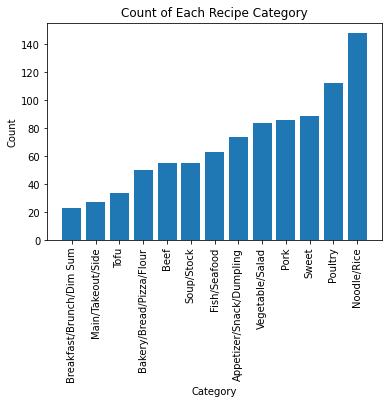

In [95]:
#Bar graph of category counts
categories = list(common_recipe_category_count['Category'])
counts = list(common_recipe_category_count['Count'])
height = np.arange(len(counts))

plt.bar(height, counts)
plt.xticks(height, categories, rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Each Recipe Category")
plt.show()

Nice!

In [96]:
thewoksoflife.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 1573
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            900 non-null    object 
 1   Category        900 non-null    object 
 2   Prep_Time       900 non-null    object 
 3   Cook_Time       900 non-null    object 
 4   Total_Time      900 non-null    object 
 5   Ingredients     900 non-null    object 
 6   Calories        820 non-null    object 
 7   Average_Rating  900 non-null    float64
 8   Review_Count    900 non-null    float64
 9   URL             900 non-null    object 
dtypes: float64(2), object(8)
memory usage: 77.3+ KB


### "Prep_Time"

Let us look at the "Prep_Time" column.

In [97]:
#Prep_Time
thewoksoflife["Prep_Time"].describe()

count     900
unique     54
top        10
freq      123
Name: Prep_Time, dtype: object

In [98]:
#Histogram of Prep_Time
#plt.hist(thewoksoflife["Prep_Time"])
#plt.xlabel("Prep_Time")
#plt.ylabel('Frequency')
#plt.show()

In [99]:
#Boxplot of Prep_Time
#thewoksoflife.boxplot("Prep_Time")
#plt.show()

In [100]:
#Descriptive statistics of Prep_Time
#stats.describe(thewoksoflife["Prep_Time"])

In [101]:
thewoksoflife["Prep_Time"].unique()

array(['90', 0, '30', '60', '35', '40', '25', '10', '20', '15', '5', '50',
       '165', '45', '150', '180', '2', '120', '360', '600', '720', '480',
       '4320', '1440', '135', '75', '85', '80', '960', '750', '3', '240',
       '300', '105', '70', '220', '160', '100', '140', '195', '735',
       '2880', '1200', '420', '1560', '95', '155', '215', '270', '330',
       '130', '500', '5760', '210'], dtype=object)

In [102]:
thewoksoflife["Prep_Time"]

0       90
1        0
2       30
3       30
4       30
        ..
1430    20
1499     5
1533    40
1544    10
1573     5
Name: Prep_Time, Length: 900, dtype: object

In [103]:
recipe_prep_time_count = thewoksoflife.groupby(['Prep_Time'])['Prep_Time'].count().reset_index(name='Count')

In [104]:
#recipe_prep_time_count

In [105]:
recipe_prep_time_count_sorted = recipe_prep_time_count.sort_values(by='Count', ascending=True)

In [106]:
recipe_prep_time_count_sorted

,Prep_Time,Count
53,960,1
18,2,1
25,270,1
13,1560,1
12,155,1
30,330,1
22,220,1
35,4320,1
20,210,1
41,5760,1


The ten most common prep times for recipes:
10, 15, 20, 30, 5, 60, 25, 45, 130, 25 minutes.

The five most common prep times for recipes:
10, 15, 20, 30, 5 minutes.

Bar graph!

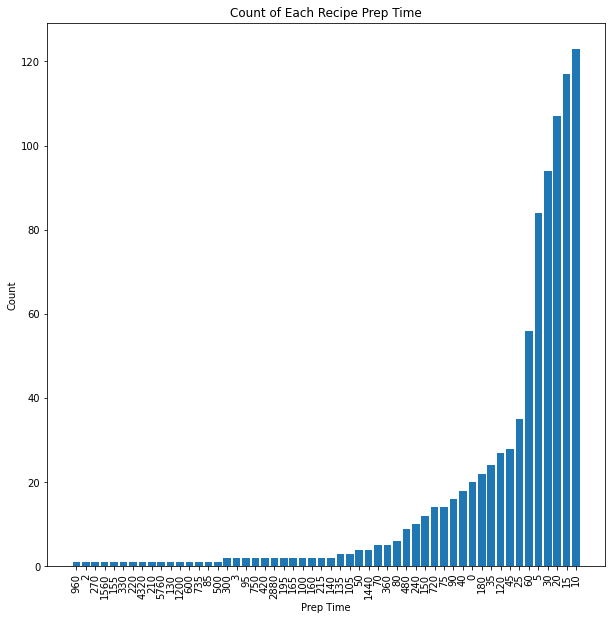

In [148]:
#Bar graph of prep time counts
prep_times = list(recipe_prep_time_count_sorted['Prep_Time'])
counts = list(recipe_prep_time_count_sorted['Count'])
height = np.arange(len(counts))

plt.figure(figsize=(10, 10))
plt.bar(height, counts)
plt.xticks(height, prep_times, rotation=90)
plt.xlabel("Prep Time")
plt.ylabel("Count")
plt.title("Count of Each Recipe Prep Time")

plt.show()

In [107]:
#print(type(recipe_prep_time_count["Prep_Time"]))
#print(type(recipe_prep_time_count))
#recipe_prep_time_count['Count'].sum()
#recipe_prep_time_count["Prep_Time"]*recipe_prep_time_count['Count']
#(recipe_prep_time_count["Prep_Time"]*recipe_prep_time_count['Count'])/recipe_prep_time_count['Count'].sum()
#recipe_prep_time_count.sort_values(by='Count', ascending=False)

In [108]:
#x=pd.to_numeric(thewoksoflife["Prep_Time"])
#(pd.to_numeric(recipe_prep_time_count_sorted["Prep_Time"]))*(pd.to_numeric(recipe_prep_time_count_sorted["Count"]))
#x.sum()

What is the average prep time (in minutes) for a recipe?

In [135]:
#total number of minutes for all recipes count formula
total_minutes_prep_time=(pd.to_numeric(recipe_prep_time_count_sorted["Prep_Time"]))*(pd.to_numeric(recipe_prep_time_count_sorted["Count"]))

In [136]:
#determine the total number of minutes for all recipes
total_minutes_prep_time.sum()

80903

In [137]:
#total number of all recipes count formula
total_count_prep_time = (pd.to_numeric(recipe_prep_time_count_sorted["Count"]))

In [138]:
#determine the total count all recipes
total_count_prep_time.sum()

900

In [139]:
#Calculate the average
total_minutes_prep_time.sum()/total_count_prep_time.sum()

89.89222222222222

The average prep time for a recipe is approximately 90 minutes.

### "Cook_Time"

Look at the "Cook_Time" column.

In [141]:
#Cook_Time
thewoksoflife["Cook_Time"].describe()

count     900
unique     50
top        10
freq      158
Name: Cook_Time, dtype: object

In [142]:
thewoksoflife["Cook_Time"].unique()

array(['45', '10', '15', '40', 0, '5', '255', '60', '25', '20', '195',
       '30', '50', '300', '330', '35', '180', '120', '140', '8', '210',
       '90', '240', '150', '100', '480', '135', '165', '70', '75', '155',
       '7', '12', '85', '270', '55', '16', '225', '105', '6', '420',
       '190', '4320', '170', '265', '80', '18', '2', '3', '360'],
      dtype=object)

In [143]:
thewoksoflife["Cook_Time"]

0       45
1       10
2       15
3       45
4       40
        ..
1430    30
1499    20
1533     0
1544     0
1573     0
Name: Cook_Time, Length: 900, dtype: object

In [144]:
recipe_cook_time_count = thewoksoflife.groupby(['Cook_Time'])['Cook_Time'].count().reset_index(name='Count')

In [145]:
recipe_cook_time_count_sorted = recipe_cook_time_count.sort_values(by='Count', ascending=True)

In [146]:
recipe_cook_time_count_sorted

,Cook_Time,Count
24,255,1
34,420,1
32,360,1
27,3,1
26,270,1
25,265,1
21,225,1
35,4320,1
16,190,1
14,18,1


The ten most common cook times for recipes:
10, 15, 20, 30, 5, 25, 45, 0, 60, 35 minutes.

The five most common cook times for recipes:
10, 15, 20, 30, 5 minutes.

Bar graph!

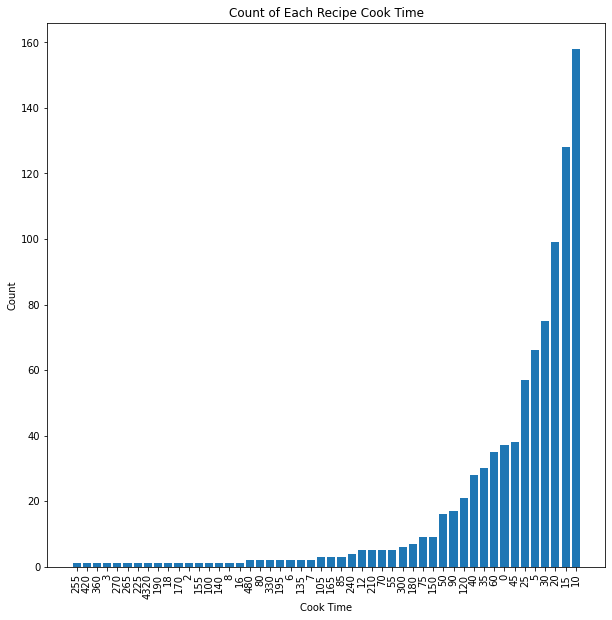

In [147]:
#Bar graph of cook time counts
cook_times = list(recipe_cook_time_count_sorted['Cook_Time'])
counts = list(recipe_cook_time_count_sorted['Count'])
height = np.arange(len(counts))

plt.figure(figsize=(10, 10))
plt.bar(height, counts)
plt.xticks(height, cook_times, rotation=90)
plt.xlabel("Cook Time")
plt.ylabel("Count")
plt.title("Count of Each Recipe Cook Time")

plt.show()

What is the average cook time (in minutes) for a recipe?

In [149]:
#total number of minutes for all recipes count formula
total_minutes_cook_time=(pd.to_numeric(recipe_cook_time_count_sorted["Cook_Time"]))*(pd.to_numeric(recipe_cook_time_count_sorted["Count"]))

In [150]:
#determine the total number of minutes for all recipes
total_minutes_cook_time.sum()

38543

In [151]:
#total number of all recipes count formula
total_count_cook_time = (pd.to_numeric(recipe_cook_time_count_sorted["Count"]))

In [152]:
#determine the total count all recipes
total_count_cook_time.sum()

900

In [153]:
#Calculate the average
total_minutes_cook_time.sum()/total_count_cook_time.sum()

42.82555555555555

The average cook time for a recipe is approximately 43 minutes.

### "Total_Time"

Look at the "Total_Time" column.

In [154]:
#Total_Time
thewoksoflife["Total_Time"].describe()

count     900
unique    121
top        45
freq       78
Name: Total_Time, dtype: object

In [155]:
thewoksoflife["Total_Time"].unique()

array(['135', '10', '45', '75', '70', '60', '50', '35', '20', '275',
       '510', '25', '210', '40', '30', '15', '55', '65', '300', '360',
       '180', '150', '205', '190', '225', '80', '185', '120', '105', '90',
       '330', '195', '170', '450', '630', '960', '505', '4350', '540',
       '110', '310', '155', '1920', '95', '165', '270', '765', '745',
       '215', '870', '395', '140', '495', '515', '200', '1005', '810',
       '255', '22', '750', '990', '320', '46', '1525', '240', 0, '5',
       '85', '130', '16', '160', '900', '425', '730', '555', '260', '66',
       '340', '265', '620', '925', '100', '1470', '345', '885', '220',
       '3000', '1500', '420', '4365', '230', '145', '755', '775', '1560',
       '490', '405', '315', '125', '1570', '93', '305', '2920', '740',
       '162', '660', '250', '480', '840', '520', '285', '570', '42', '72',
       '14505', '5760', '10080', '12', '18', '390', '365'], dtype=object)

In [156]:
thewoksoflife["Total_Time"]

0       135
1        10
2        45
3        75
4        70
       ... 
1430     50
1499     25
1533     40
1544     10
1573      5
Name: Total_Time, Length: 900, dtype: object

In [157]:
recipe_total_time_count = thewoksoflife.groupby(['Total_Time'])['Total_Time'].count().reset_index(name='Count')

In [158]:
recipe_total_time_count_sorted = recipe_total_time_count.sort_values(by='Count', ascending=True)

In [159]:
recipe_total_time_count_sorted

,Total_Time,Count
120,990,1
97,660,1
96,66,1
94,630,1
93,620,1
...,...,...
92,60,57
68,40,58
34,20,60
53,30,66


The five most common total times for recipes:
45, 30, 20, 40, 60 minutes.

Bar graph!

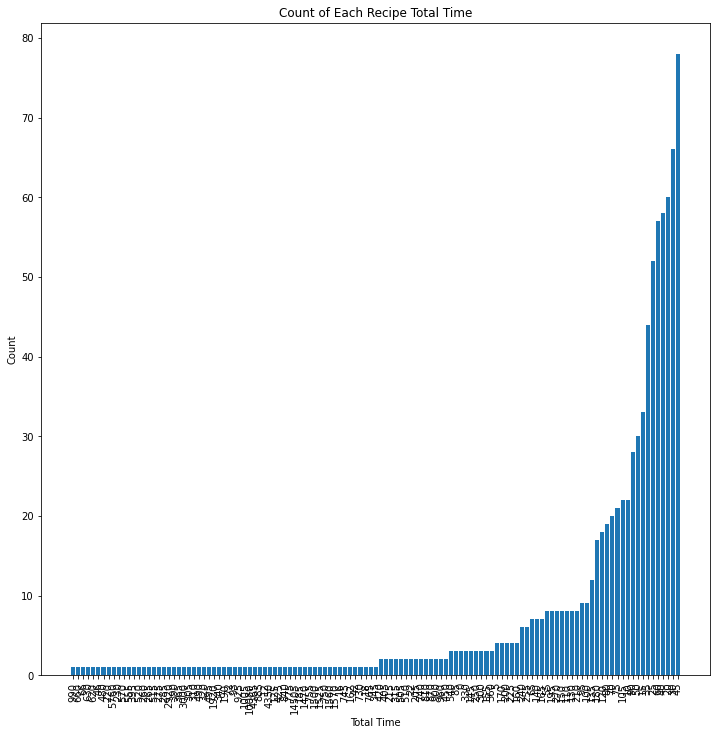

In [164]:
#Bar graph of total time counts
total_times = list(recipe_total_time_count_sorted['Total_Time'])
counts = list(recipe_total_time_count_sorted['Count'])
height = np.arange(len(counts))

plt.figure(figsize=(12, 12))
plt.bar(height, counts)
plt.xticks(height, total_times, rotation=90)
plt.xlabel("Total Time")
plt.ylabel("Count")
plt.title("Count of Each Recipe Total Time")

plt.show()

What is the average total time (in minutes) for a recipe?

In [165]:
#total number of minutes for all recipes count formula
total_minutes_total_time=(pd.to_numeric(recipe_total_time_count_sorted["Total_Time"]))*(pd.to_numeric(recipe_total_time_count_sorted["Count"]))

In [166]:
#determine the total number of minutes for all recipes
total_minutes_total_time.sum()

149096

In [167]:
#total number of all recipes count formula
total_count_total_time = (pd.to_numeric(recipe_total_time_count_sorted["Count"]))

In [168]:
#determine the total count all recipes
total_count_total_time.sum()

900

In [169]:
#Calculate the average
total_minutes_total_time.sum()/total_count_total_time.sum()

165.66222222222223

The average prep time for a recipe is approximately 167 minutes.

### Ingredients

Look at the "Ingredients" column.

### What are the most commonly used Ingredients?

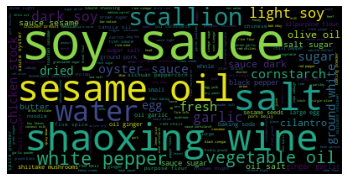

In [177]:
ingredients_wordcloud = WordCloud().generate(' '.join(thewoksoflife['Ingredients']))
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Common ingredients appear to be: "soy sauce", "sesame oil", "salt", "shaoxing wine", "scallion", "white pepper", "water", "vegetable oil", "cornstarch".

### Calories

Look at the "Calories" column.

### How many recipes are there for each calorie amount?

In [244]:
#how many recipes are there for each calorie amount?

In [245]:
recipe_calorie_count = thewoksoflife.groupby(['Calories'])['Calories'].count().reset_index(name='Count')

In [246]:
recipe_calorie_count

,Calories,Count
0,100,1
1,102,2
2,105,1
3,106,1
4,109,2
...,...,...
448,90,1
449,931,1
450,95,2
451,979,1


### What are the 5 most common calorie amounts for recipes?

In [247]:
recipe_calorie_count_sorted = thewoksoflife.groupby(['Calories'])['Calories'].count().reset_index(name='Count').sort_values(by=['Count'], ascending=False)

In [248]:
recipe_calorie_count_sorted

,Calories,Count
97,232,6
113,250,6
155,294,5
88,220,5
168,308,5
...,...,...
291,453,1
292,454,1
293,455,1
57,183,1


The five most common calorie amounts for recipes are: 232, 250, 294, 220, 308.

In [252]:
#Bar graph of calorie amounts
#calories = list(recipe_calorie_count_sorted['Calories'])
#counts = list(recipe_calorie_count_sorted['Count'])
#height = np.arange(len(counts))

#plt.figure(figsize=(12, 12))
#plt.bar(height, counts)
#plt.xticks(height, calories, rotation=90)
#plt.xlabel("Calories")
#plt.ylabel("Count")
#plt.title("Count of Each Recipe Calories")
#plt.show()
#this does not help much in exploration and analysis.

### Average_Rating

In [253]:
#Average_Rating
thewoksoflife["Average_Rating"].describe()

count    900.000000
mean       4.447067
std        1.428081
min        0.000000
25%        4.800000
50%        4.950000
75%        5.000000
max        5.000000
Name: Average_Rating, dtype: float64

In [254]:
thewoksoflife["Average_Rating"].unique()

array([5.  , 4.89, 4.67, 4.87, 4.9 , 4.96, 0.  , 4.98, 4.92, 4.75, 4.94,
       4.91, 4.82, 4.93, 4.88, 4.8 , 4.34, 4.5 , 4.72, 4.6 , 4.77, 4.97,
       4.86, 4.84, 4.7 , 4.25, 4.95, 4.73, 4.85, 4.83, 4.81, 4.28, 4.  ,
       4.78, 4.99, 4.69, 4.58, 3.  , 4.63, 4.41, 4.55, 4.64, 4.79, 4.62,
       4.43, 4.46])

In [255]:
thewoksoflife["Average_Rating"]

0       5.00
1       5.00
2       4.89
3       4.67
4       5.00
        ... 
1430    5.00
1499    5.00
1533    5.00
1544    5.00
1573    4.98
Name: Average_Rating, Length: 900, dtype: float64

In [256]:
recipe_average_rating_count = thewoksoflife.groupby(['Average_Rating'])['Average_Rating'].count().reset_index(name='Count')

In [257]:
recipe_average_rating_count_sorted = recipe_average_rating_count.sort_values(by='Count', ascending=True)

In [258]:
recipe_average_rating_count_sorted

,Average_Rating,Count
26,4.81,1
1,3.00,1
15,4.64,1
4,4.28,1
6,4.41,1
7,4.43,1
8,4.46,1
13,4.62,1
10,4.55,1
11,4.58,1


The five most common average ratings for recipes are:
5, 0 (unrated), 4.91, 4.93, 4.86.

Bar graph!

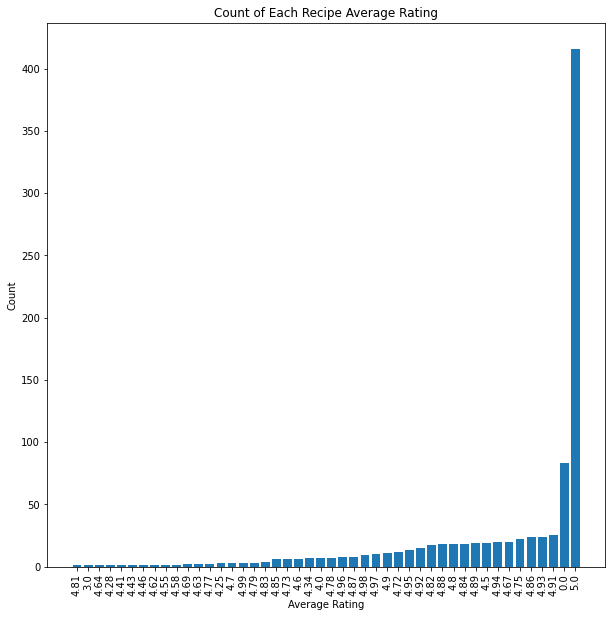

In [259]:
#Bar graph of average rating counts
average_ratings = list(recipe_average_rating_count_sorted['Average_Rating'])
counts = list(recipe_average_rating_count_sorted['Count'])
height = np.arange(len(counts))

plt.figure(figsize=(10, 10))
plt.bar(height, counts)
plt.xticks(height, average_ratings, rotation=90)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Count of Each Recipe Average Rating")

plt.show()

What is the average average rating for a recipe?

In [260]:
#total average ratings for all recipes formula
total_average_ratings=(pd.to_numeric(recipe_average_rating_count_sorted["Average_Rating"]))*(pd.to_numeric(recipe_average_rating_count_sorted["Count"]))

In [261]:
#determine the total number of average ratings for all recipes
total_average_ratings.sum()

4002.3599999999997

In [262]:
#total number of average ratings count formula
total_count_average_ratings = (pd.to_numeric(recipe_average_rating_count_sorted["Count"]))

In [263]:
#determine the total count all recipes
total_count_average_ratings.sum()

900

In [264]:
#Calculate the average
total_average_ratings.sum()/total_count_average_ratings.sum()

4.447066666666666

The average average rating for a recipe is approximately 4.45.

### Review_Count

Look at the "Review_Count" column.

In [265]:
#Review_Count
thewoksoflife["Review_Count"].describe()

count    900.000000
mean      12.007778
std       19.097809
min        0.000000
25%        2.000000
50%        7.000000
75%       14.000000
max      205.000000
Name: Review_Count, dtype: float64

In [266]:
thewoksoflife["Review_Count"].unique()

array([  2.,   5.,   9.,   3.,   4.,  30.,  38.,  21.,  18.,  43.,  10.,
         0.,   1.,  12.,  25.,  13.,  14.,  40.,  17.,  11.,  23.,  58.,
        46.,   6.,  28.,  48.,  16.,   8.,  36.,  88.,  15.,   7.,  56.,
        20.,  33.,  22.,  26.,  42.,  27.,  83.,  97.,  31.,  55.,  65.,
        35.,  29.,  37.,  41.,  90.,  24.,  47.,  19.,  44.,  78., 182.,
       103.,  39.,  74.,  57., 205., 127.,  68., 110.,  51.,  87.,  34.,
        45.,  49., 172., 118.,  32., 189.])

In [267]:
thewoksoflife["Review_Count"]

0        2.0
1        5.0
2        9.0
3        3.0
4        4.0
        ... 
1430     2.0
1499     1.0
1533     3.0
1544     9.0
1573    44.0
Name: Review_Count, Length: 900, dtype: float64

In [269]:
recipe_review_count_count = thewoksoflife.groupby(['Review_Count'])['Review_Count'].count().reset_index(name='Count')

In [270]:
recipe_review_count_count_sorted = recipe_review_count_count.sort_values(by='Count', ascending=True)

In [271]:
recipe_review_count_count_sorted

,Review_Count,Count
71,205.0,1
46,46.0,1
47,47.0,1
42,42.0,1
49,49.0,1
...,...,...
3,3.0,63
4,4.0,67
1,1.0,76
2,2.0,80


The five most common number of review for recipes:
0, 2, 1, 4 and 3.

There are not that many reviews left on recipes!

Bar graph!

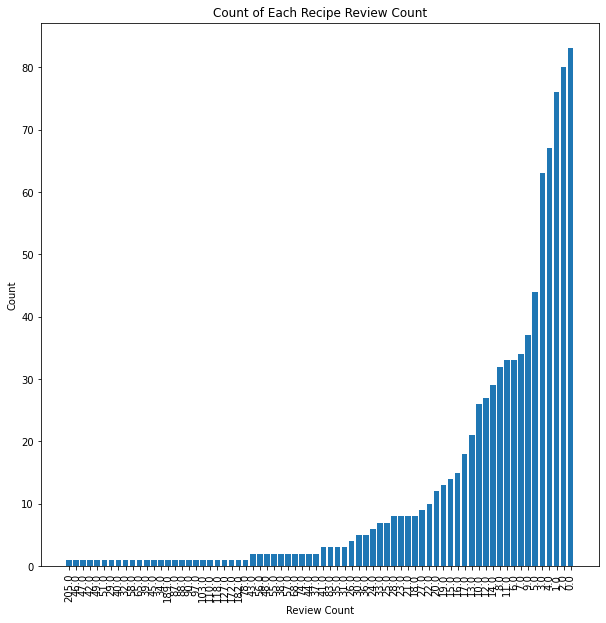

In [272]:
#Bar graph of review count counts
review_counts = list(recipe_review_count_count_sorted['Review_Count'])
counts = list(recipe_review_count_count_sorted['Count'])
height = np.arange(len(counts))

plt.figure(figsize=(10, 10))
plt.bar(height, counts)
plt.xticks(height, review_counts, rotation=90)
plt.xlabel("Review Count")
plt.ylabel("Count")
plt.title("Count of Each Recipe Review Count")

plt.show()

What is the average review count (number) for a recipe?

In [273]:
#total number of review counts for all recipes formula
total_review_counts=(pd.to_numeric(recipe_review_count_count_sorted["Review_Count"]))*(pd.to_numeric(recipe_review_count_count_sorted["Count"]))

In [277]:
#determine the total number of reviews for all recipes
total_review_counts.sum()

10807.0

In [278]:
#total number of all recipes count formula
total_count_review_count = (pd.to_numeric(recipe_review_count_count_sorted["Count"]))

In [279]:
#determine the total count of all recipe reviews
total_count_review_count.sum()

900

In [280]:
#Calculate the average
total_review_counts.sum()/total_count_review_count.sum()

12.007777777777777

The average number of reviews per recipe is approximately 12. 

### Further Questions for Exploration

### Which 4 categories are the highest in calories?

### Which 3 categories are the lowest in calories?

Remember from before there are recipes with no calories. We want to drop them from this in order to make the graph cleaner!

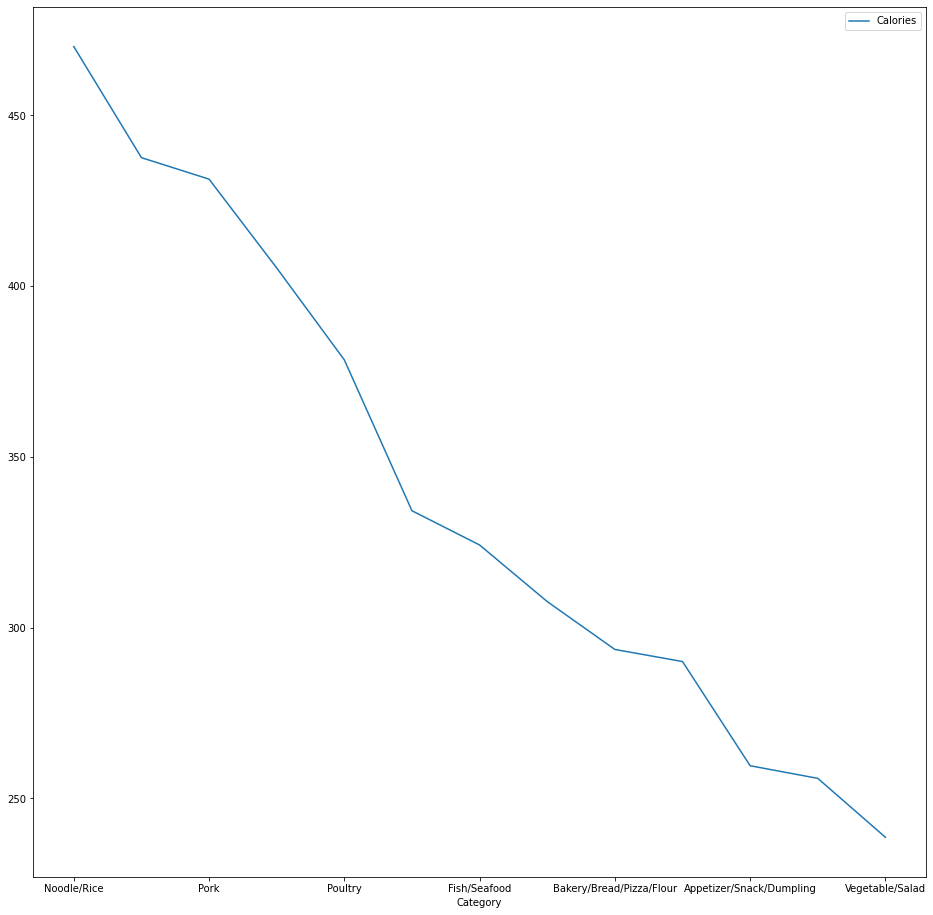

In [297]:
thewoksoflife['Calories'] = pd.to_numeric(thewoksoflife['Calories'])
calories = thewoksoflife.dropna(subset=['Calories'])

plt.figure(figsize=(16, 16))
calories.groupby('Category').Calories.mean().sort_values(ascending=False).plot(legend=True)
plt.show()

The 4 categories highest in calories:
"Noodle/Rice", "Pork", "Poultry", "Fish/Seafood".

The 3 categories lowest in calories:
"Vegetable/Salad", "Appetizer/Snack/Dumpling", "Bakery/Bread/Pizza/Flour".

In [301]:
#check to make sure original dataframe, no rows were dropped
#thewoksoflife.shape
#thewoksoflife.info()

### What are the average ratings per category?

### What are the five categories with the highest average rating?

### What are the five catgories with the lowest average rating?

For this, we only want to utilize the data with the rows dropped where calories is missing!

In [303]:
average_rating_per_category = calories.groupby('Category')['Average_Rating'].mean().sort_values(ascending=False)

In [304]:
average_rating_per_category

Category
Tofu                        4.906897
Poultry                     4.690777
Noodle/Rice                 4.674559
Appetizer/Snack/Dumpling    4.660000
Breakfast/Brunch/Dim Sum    4.650000
Beef                        4.627059
Soup/Stock                  4.619796
Fish/Seafood                4.583273
Pork                        4.516410
Main/Takeout/Side           4.502083
Bakery/Bread/Pizza/Flour    4.433902
Vegetable/Salad             4.377500
Sweet                       3.699157
Name: Average_Rating, dtype: float64

The five categories with highest average rating:
"Tofu", "Poultry", "Noodle/Rice", "Appetizer/Snack/Dumpling", "Breakfast/Brunch/Dim Sum".

The five categories with the lowest average rating:
"Sweet", "Vegetable/Salad", "Bakery/Bread/Pizza/Flour", "Main/Takeout/Side", "Pork".

## That is it for this Notebook, move on to *"3. Final Capstone - The Woks of Life Recommendation Engine Recipe Recommender"*